# Facial Features

This model uses an input of 224x112

### Imports

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from pynq_dpu import DpuOverlay

### DPU

In [2]:
overlay = DpuOverlay("dpu.bit")
overlay.load_model("face_landmark.xmodel")

In [3]:
dpu = overlay.runner

### Tensors

These are some tensors that we can use.

In [4]:
inputTensors = dpu.get_input_tensors()
outputTensors = dpu.get_output_tensors()

shapeIn = tuple(inputTensors[0].dims)
shapeOut = tuple(outputTensors[0].dims)

print(shapeIn)
print(shapeOut)


(1, 96, 72, 3)
(1, 10)


cool stuff is happening here.

(183, 275, 3)


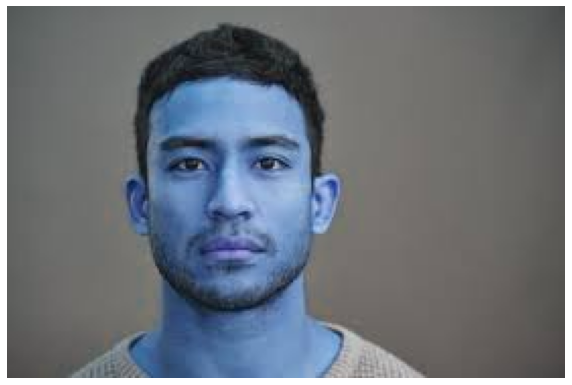

In [5]:
img = cv.imread('img/better_face.jpg')

plt.figure(figsize=(10,10)), plt.axis("off"), plt.imshow(img);
print(img.shape)

In [6]:
def plot_images(original_image, processed_image):
    plt.figure(figsize=(20, 20))
    plt.subplot(121),plt.imshow(original_image),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed_image),plt.title('Processed')
    plt.xticks([]), plt.yticks([])
    plt.show()

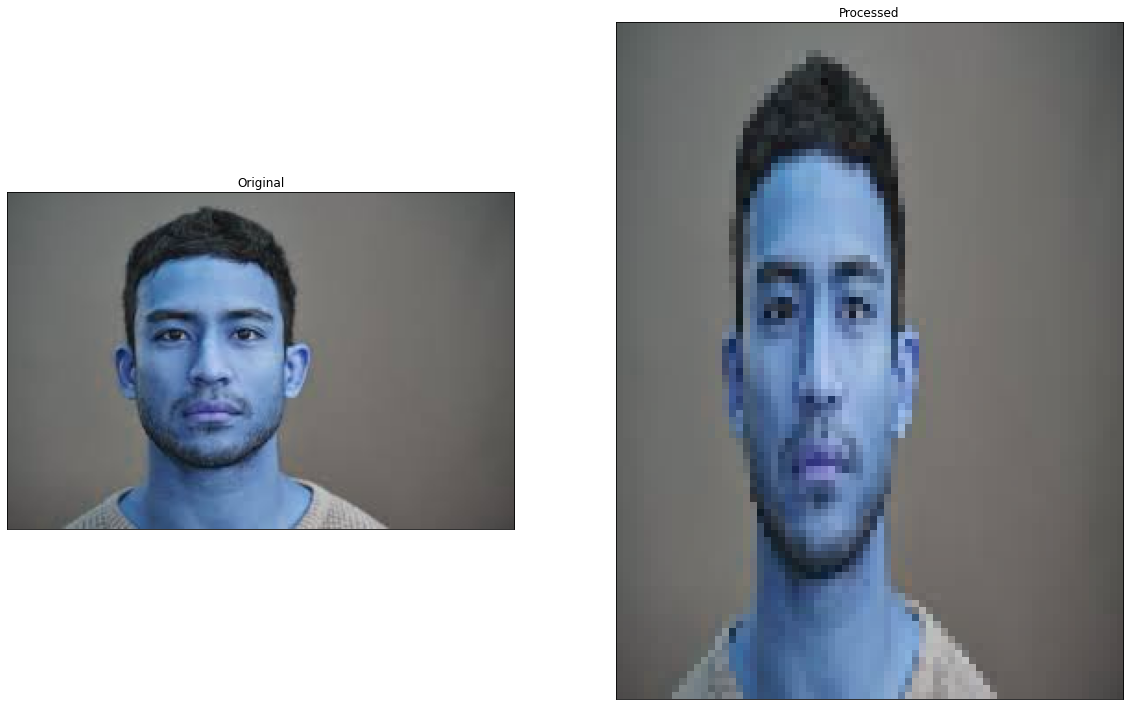

Size of original image:  (183, 275, 3)
Size of resized image:  (96, 72, 3)


In [7]:
height, width = (96,72)
resized_img = cv.resize(img, (width, height))

plot_images(img,resized_img)
print("Size of original image: ", img.shape)
print("Size of resized image: ", resized_img.shape)

In [8]:
input_data = [np.empty(shapeIn, dtype=np.float32, order="C")]
output_data = [np.empty(shapeOut, dtype=np.float32, order="C")]
image = input_data[0]

image[0,...] = resized_img.reshape(shapeIn[1:])
job_id = dpu.execute_async(input_data, output_data)
dpu.wait(job_id)

0

[24.75, 25.3125, 43.875, 55.125, 56.25]
[30.0, 71.25, 48.75, 30.0, 62.25]
[array([[0.3125   , 0.7421875, 0.5078125, 0.3125   , 0.6484375, 0.34375  ,
        0.3515625, 0.609375 , 0.765625 , 0.78125  ]], dtype=float32)]


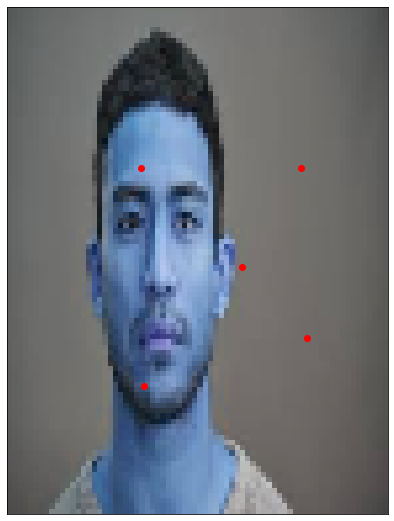

In [9]:
plt.figure(figsize=(15, 15))
plt.subplot(122), plt.imshow(resized_img)
plt.xticks([]), plt.yticks([])

out_arr = output_data[0]
out_arr = out_arr[0]
x = [out_arr[5]*width, out_arr[6]*width, out_arr[7]*width, out_arr[8]*width, out_arr[9]*width]
y = [out_arr[0]*height, out_arr[1]*height, out_arr[2]*height, out_arr[3]*height, out_arr[4]*height]
plt.plot(x,y, 'ro')
print(x)
print(y)
print(output_data)